In [1]:
import pandas as pd
import numpy as np
import uci_dataset as database

import raimitigations.dataprocessing as dp

# Case Study 3

## 1 - Understanding the Data

Case study 3 examines the thyroid disease dataset. We will explore how this dataset with the `dataprocessing` library.

In [2]:
df = database.load_thyroid_disease()
label_col = "sick-euthyroid"
df

,sick-euthyroid,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,sick-euthyroid,72.0,M,f,f,f,f,f,f,f,...,y,1.0,y,83.0,y,0.95,y,87.0,n,NaN
1,sick-euthyroid,45.0,F,f,f,f,f,f,f,f,...,y,1.0,y,82.0,y,0.73,y,112.0,n,NaN
2,sick-euthyroid,64.0,F,f,f,f,f,f,f,f,...,y,1.0,y,101.0,y,0.82,y,123.0,n,NaN
3,sick-euthyroid,56.0,M,f,f,f,f,f,f,f,...,y,0.8,y,76.0,y,0.77,y,99.0,n,NaN
4,sick-euthyroid,78.0,F,t,f,f,f,t,f,f,...,y,0.3,y,87.0,y,0.95,y,91.0,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,40.0,F,f,f,f,f,f,f,f,...,y,1.2,y,76.0,y,0.90,y,84.0,n,NaN
3159,negative,69.0,F,f,f,f,f,f,f,f,...,y,1.8,y,126.0,y,1.02,y,124.0,n,NaN
3160,negative,58.0,F,f,f,f,f,f,f,f,...,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3161,negative,29.0,F,f,f,f,f,f,f,f,...,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN


In [3]:
df[label_col] = df[label_col].replace({"sick-euthyroid": 1, "negative": 0})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sick-euthyroid             3163 non-null   int64  
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [5]:
df['query_on_thyroxine'].value_counts()

f    3108
t      55
Name: query_on_thyroxine, dtype: int64

The dataset is imbalanced, as most patients in the dataset do not have thyroid disease.

In [6]:
counts = df['query_on_thyroxine'].value_counts().values
counts

array([3108,   55], dtype=int64)

In [7]:
cor_feat = dp.CorrelatedFeatures(
					method_num_num=["spearman", "pearson", "kendall"],				# Used for Numerical x Numerical correlations
					num_corr_th=0.9,												# Used for Numerical x Numerical correlations
					num_pvalue_th=0.05,												# Used for Numerical x Numerical correlations
					method_num_cat="model",											# Used for Numerical x Categorical correlations
					model_metrics=["f1", "auc"],									# Used for Numerical x Categorical correlations
					metric_th=0.9,													# Used for Numerical x Categorical correlations
					cat_corr_th=0.9,												# Used for Categorical x Categorical correlations
					cat_pvalue_th=0.01,												# Used for Categorical x Categorical correlations
					json_summary="./corr_json/c3_summary.json",
					json_corr="./corr_json/c3_corr.json",
					json_uncorr="./corr_json/c3_uncorr.json"
				)
cor_feat.fit(df=df, label_col=label_col)

Remember to look through the JSON files generated in the previous cell. Correlations have been found, which can be seen in `c3_corr.json`.

## 2 - Basic Pre-Processing

### Encode Categorical Variables
The dataset contains a number of columns that are categorical. `EncoderOHE` is used to perform One Hot Encoding on the dataset.

In [8]:
# Encode the categorical columns using One-Hot Encoding
enc_ohe = dp.EncoderOHE()
enc_ohe.fit(df)
proc_df = enc_ohe.transform(df)
proc_df

No columns specified for encoding. These columns have been automatically identfied as the following:
['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
new_col_names = ['sex_M', 'sex_nan', 'on_thyroxine_t', 'query_on_thyroxine_t', 'on_antithyroid_medication_t', 'thyroid_surgery_t', 'query_hypothyroid_t', 'query_hyperthyroid_t', 'pregnant_t', 'sick_t', 'tumor_t', 'lithium_t', 'goitre_t', 'TSH_measured_y', 'T3_measured_y', 'TT4_measured_y', 'T4U_measured_y', 'FTI_measured_y', 'TBG_measured_y']


,sick-euthyroid,age,TSH,T3,TT4,T4U,FTI,TBG,sex_M,sex_nan,...,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
0,1,72.0,NaN,1.0,83.0,0.95,87.0,NaN,1,0,...,0,0,0,0,0,1,1,1,1,0
1,1,45.0,1.90,1.0,82.0,0.73,112.0,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0
2,1,64.0,0.09,1.0,101.0,0.82,123.0,NaN,0,0,...,1,0,0,0,1,1,1,1,1,0
3,1,56.0,0.00,0.8,76.0,0.77,99.0,NaN,1,0,...,0,0,0,0,1,1,1,1,1,0
4,1,78.0,2.60,0.3,87.0,0.95,91.0,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,40.0,2.10,1.2,76.0,0.90,84.0,NaN,0,0,...,1,0,0,0,1,1,1,1,1,0
3159,0,69.0,2.60,1.8,126.0,1.02,124.0,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0
3160,0,58.0,5.80,1.7,86.0,0.91,95.0,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0
3161,0,29.0,0.80,1.8,99.0,1.01,98.0,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0


### Impute Missing Data

A number of features contain missing values. We will use `BasicImputer` to fill these values with -1

In [9]:
proc_df.isna().sum()

sick-euthyroid                    0
age                             446
TSH                             468
T3                              695
TT4                             249
T4U                             248
FTI                             247
TBG                            2903
sex_M                             0
sex_nan                           0
on_thyroxine_t                    0
query_on_thyroxine_t              0
on_antithyroid_medication_t       0
thyroid_surgery_t                 0
query_hypothyroid_t               0
query_hyperthyroid_t              0
pregnant_t                        0
sick_t                            0
tumor_t                           0
lithium_t                         0
goitre_t                          0
TSH_measured_y                    0
T3_measured_y                     0
TT4_measured_y                    0
T4U_measured_y                    0
FTI_measured_y                    0
TBG_measured_y                    0
dtype: int64

In [10]:
imputer = dp.BasicImputer(numerical={'missing_values':np.nan,
									'strategy':'constant',
									'fill_value':-1})
imputer.fit(proc_df)
proc_df = imputer.transform(proc_df)

No columns specified for imputation. These columns have been automatically identified:
['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']


### Split Dataset

In [11]:
train_x, test_x, train_y, test_y = dp.split_data(proc_df, label_col, test_size=0.25)

## 2 - Baseline Models

In this example, we have an imbalanced dataset (most patients do not have thyroid disease). While we will take a look at a number of different metrics, we will be focused on improved the F1 score for this dataset.

After splitting the data into train and test sets, we will build two baseline models, one with XGBoost, and the other with KNN.

------------
TEST
------------
[[696  22]
 [  7  66]]


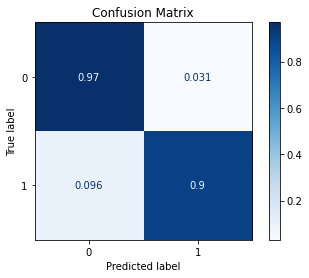

Acuracy: 96.33%

Precision:  0.8700213371266003

Recall:  0.9367344602587095

F1 =  0.8997338065661046

ROC AUC =  0.9626626473842865


In [12]:
model = dp.train_model_plot_results(train_x, train_y, test_x, test_y, model_name="xgb", train_result=False, plot_pr=False)

------------
TEST
------------
[[534 184]
 [ 27  46]]


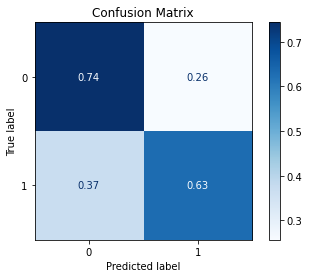

Acuracy: 73.32%

Precision:  0.5759358288770053

Recall:  0.6869347884153089

F1 =  0.5693288640826553

ROC AUC =  0.7062330675010493


In [13]:
model = dp.train_model_plot_results(train_x, train_y, test_x, test_y, model_name="knn", train_result=False, plot_pr=False)

## 3 - Data Transformation

We will perform a number of different feature transformations, using the Scalers from `dataprocessing`.

### DataMinMaxScaler

The first data transformation we will perform is a MinMaxScaler, which will scale each feature to have a range between zero and one

------------
TEST
------------
[[631  87]
 [ 13  60]]


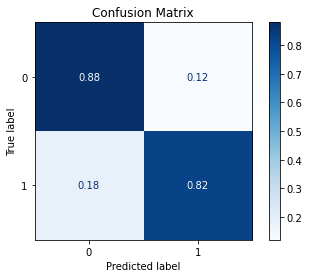

Acuracy: 87.36%

Precision:  0.6939884649511978

Recall:  0.8503739458923188

F1 =  0.7360165531971701

ROC AUC =  0.8759777921929256


In [14]:
scaler = dp.DataMinMaxScaler()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

### DataNormalizer

Next we try `DataNormalizer`, which will scale the vectors to have unit norm (i.e. vector of length one). This is often used in text classification, but we will use it here as well. 

No columns specified for imputation. These columns have been automatically identified:
[]
------------
TEST
------------
[[541 177]
 [ 23  50]]


/home/mmendonca/ResponsibleAI/code/git/responsible-ai-mitigations/raimitigations/dataprocessing/model_utils.py:97: RuntimeWarning: invalid value encountered in true_divide
  fscore = (2 * precision * recall) / (precision + recall)


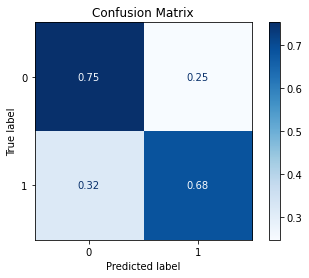

Acuracy: 74.72%

Precision:  0.5897420876683226

Recall:  0.7192067004998663

F1 =  0.5886635465418617

ROC AUC =  0.7274296943564695


In [15]:
scaler = dp.DataNormalizer()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

### DataQuantileTransformer

The Quantile Transformer transforms the each feature to have a normal distribution.

------------
TEST
------------
[[628  90]
 [ 14  59]]


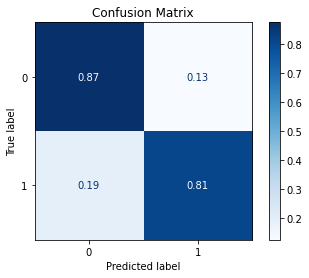

Acuracy: 86.85%

Precision:  0.6870831503899308

Recall:  0.841435494333575

F1 =  0.7275304716481188

ROC AUC =  0.863347578891136


In [16]:
scaler = dp.DataQuantileTransformer()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

### DataRobustScaler

The robust scaler centers the data (median=zero) and scales the data based on the interquartile range (IQR).

------------
TEST
------------
[[621  97]
 [ 16  57]]


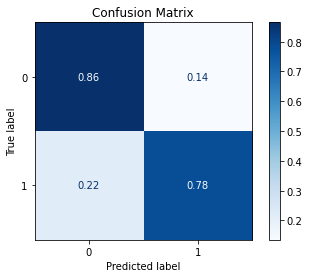

Acuracy: 85.71%

Precision:  0.6725060653632082

Recall:  0.8228622123860038

F1 =  0.7094039046117333

ROC AUC =  0.8505456557408326


In [17]:
scaler = dp.DataRobustScaler()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

### DataPowerTransformer

The power transformer makes the data more Gaussian-like (by default using the Yeo-Johnson transform).

/home/mmendonca/anaconda3/envs/rai/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


------------
TEST
------------
[[631  87]
 [ 14  59]]


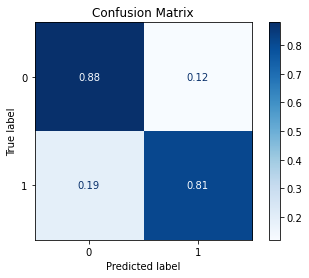

Acuracy: 87.23%

Precision:  0.6912020813422534

Recall:  0.8435246308238258

F1 =  0.7323557690697058

ROC AUC =  0.86809821803335


In [18]:
scaler = dp.DataPowerTransformer()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

### DataStandardScaler

The standard scaler sets the mean to zero and scales the vectors to have unit variance.

------------
TEST
------------
[[634  84]
 [ 14  59]]


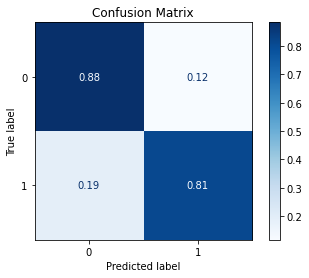

Acuracy: 87.61%

Precision:  0.6954912371579038

Recall:  0.8456137673140764

F1 =  0.7372769914863618

ROC AUC =  0.8749856908459572


In [19]:
scaler = dp.DataStandardScaler()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

## 4 - Feature Selection

Next, we perform backward feature selection, which removes features from the dataset.

In [20]:
feat_sel = dp.SeqFeatSelection(n_jobs=4, forward=False)
feat_sel.fit(X=train_x_scl, y=train_y)
train_x_sel = feat_sel.transform(train_x_scl)
test_x_sel = feat_sel.transform(test_x_scl)

No columns specified for imputation. These columns have been automatically identified:
[]
No columns specified for encoding. These columns have been automatically identfied as the following:
[]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  26 out of  26 | elapsed:    1.6s finished

[2022-08-01 10:15:15] Features: 25/1 -- score: 0.9025546457460031[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  25 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    0.2s finished

[2022-08-01 10:15:15] Features: 24/1 -- score: 0.9044481231737408[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    0.2s finished

[2022-08-01 10:15:15] Features: 23/1 -- score: 0.9036449716285807[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  23 out of  23 | elapsed:    0.1s finished

[2022-08-01 10:15:16] Features: 22/1 -- score: 0.9097123307822388[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[

In [21]:
feat_sel.get_selected_features()

['T3', 'T3_measured_y']

------------
TEST
------------
[[683  35]
 [ 11  62]]


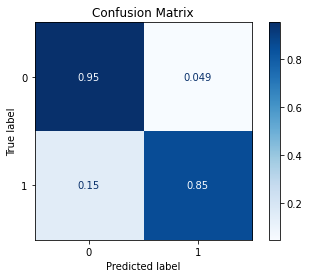

Acuracy: 94.18%

Precision:  0.8116625568198699

Recall:  0.9002842751936505

F1 =  0.8484169305115815

ROC AUC =  0.9060365551188613


In [22]:
model = dp.train_model_plot_results(train_x_sel, train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

## 5 - Synthetic Data

Since we have an imbalanced dataset, we can generate instances of the minority class to improve the balance between the classes. Below, we increase the quantity of minority instances (patients with disease) from 220 to 400.

### imblearn Library

In [23]:
train_y.value_counts()

0    2152
1     220
Name: sick-euthyroid, dtype: int64

In [24]:
rebalance = dp.Rebalance(
				X=train_x_sel,
				y=train_y,
				strategy_over={0:2152, 1:400},
				over_sampler=True,
				under_sampler=False
			)
train_x_res, train_y_res = rebalance.fit_resample()
train_y_res.value_counts()

No columns specified for imputation. These columns have been automatically identified:
[]
new_col_names = []
new_col_names = []
Running oversampling...
...finished


0    2152
1     400
Name: sick-euthyroid, dtype: int64

------------
TEST
------------
[[621  97]
 [ 10  63]]


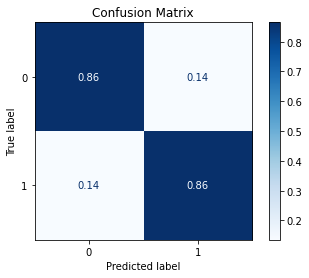

Acuracy: 86.47%

Precision:  0.6889510697305864

Recall:  0.8639581027969627

F1 =  0.730727259422812

ROC AUC =  0.9024974243522723


In [25]:
model = dp.train_model_plot_results(train_x_res, train_y_res, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

### Creating Artificial Data using Deep Learning

#### CTGAN

Let's use the dataset with the original categorical variables, since CTGAN is capable of dealing with categorical variables internally. We will start by re-encoding the ordinal variables. We then proceed to split the dataset before using the CTGAN. This guarantees that we don't contaminate our test set.

In [26]:
synth = dp.Synthesizer(
				X=train_x_sel,
				y=train_y,
				epochs=400,
				model="ctgan",
				load_existing=True
			)
synth.fit()

conditions = {label_col:1}	# create more of the undersampled class
syn_train_x, syn_train_y = synth.transform(X=train_x_sel, y=train_y, n_samples=200, conditions=conditions)

syn_train_y.value_counts()

/home/mmendonca/anaconda3/envs/rai/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/mmendonca/anaconda3/envs/rai/lib/python3.9/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/mmendonca/anaconda3/envs/rai/lib/python3.9/site-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/home/mmendonca/anaconda3/envs/rai/lib/python3.9/site-packages/ctga

0    2152
1     420
Name: sick-euthyroid, dtype: int64

------------
TEST
------------
[[682  36]
 [ 11  62]]


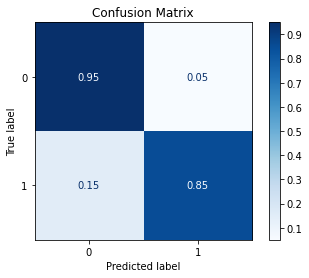

Acuracy: 94.06%

Precision:  0.808390022675737

Recall:  0.899587896363567

F1 =  0.8459182447022351

ROC AUC =  0.903937879192582


In [27]:
model = dp.train_model_plot_results(syn_train_x, syn_train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

Let's try creating more artificial instances and check how this impacts the model's performance.

------------
TEST
------------
[[637  81]
 [  7  66]]


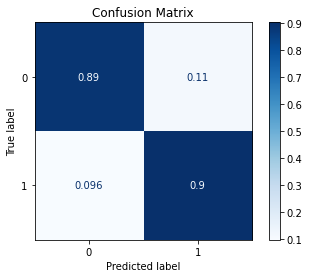

Acuracy: 88.87%

Precision:  0.7190550133096717

Recall:  0.8956481092837791

F1 =  0.7676945668135096

ROC AUC =  0.9237226695157783


In [28]:
conditions = {label_col:1}	# create more of the undersampled class
syn_train_x, syn_train_y = synth.transform(X=train_x_sel, y=train_y, n_samples=600, conditions=conditions)

model = dp.train_model_plot_results(syn_train_x, syn_train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

#### TVAE

Finally, we generate artificial instances using TVAE (a variational auto encoder for generating tabular data).

/home/mmendonca/anaconda3/envs/rai/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/mmendonca/anaconda3/envs/rai/lib/python3.9/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/mmendonca/anaconda3/envs/rai/lib/python3.9/site-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/home/mmendonca/anaconda3/envs/rai/lib/python3.9/site-packages/ctga

------------
TEST
------------
[[671  47]
 [  8  65]]


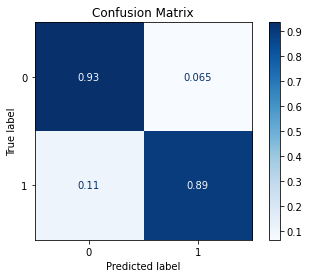

Acuracy: 93.05%

Precision:  0.7842875552282769

Recall:  0.9124756744381273

F1 =  0.8316663119812726

ROC AUC =  0.9238657610562063


In [29]:
synth = dp.Synthesizer(
				X=train_x_sel,
				y=train_y,
				epochs=400,
				model="tvae",
				load_existing=True
			)
synth.fit()

conditions = {label_col:1}	# create more of the undersampled class
syn2_train_x, syn2_train_y = synth.transform(X=train_x_sel, y=train_y, n_samples=200, conditions=conditions)

model = dp.train_model_plot_results(syn2_train_x, syn2_train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)